## The following analysis is meant to explore where it pays to go college.

### Introduction to the project

##### *The importance of a major is powerful.* Not only it can affect your life financially, but also it can help you to choose the right path to pursue. Considering the high cost of tuition no one would want to make such an expensive mistake. Some people believe that the school you go to also makes an impact to your career, especially if you go to an Ivy League school. I would like to see if this dataset can share some light on these assumptions.

##### I am trying to use this dataset to help my little sister to figure out which major and university she should choose. Obviously, I am taking into account her interests, strengths and preferences.

##### The salary report was created by PayScale to provide its users with a detailed compensation report that compares their compensation to others like them. 
##### “Where it Pays to Attend College” was created by the WSJ by extracting some of the data from PayScale’s report to provide information and compare the incomes of certain college graduates (mainly Ivy League) depending on what (major) and where (university) they studied during undergrad.




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import l1_min_c
from sklearn.metrics import roc_curve, auc
sns.set_context('talk')
sns.set_style('darkgrid')
sns.set_palette('colorblind')

##### First let's see what the dataset represents

In [2]:
#data1 is the dataset of the salary according to undergraduate major
data1 = pd.read_csv('./major.csv')
data1.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [3]:
#data2 is the dataset of the salary according to the school and region: California, Northeast, Western, MidWestern and Southern
data2 = pd.read_csv('./salreg.csv')
data2.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [4]:
#data3 is the dataset of the salary according to the school and type: Engineering, Liberal Arts and Party
data3 = pd.read_csv('./salcollege.csv')
data3.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


## Data cleaning

#### I decided to rename the column names for easier coding while still having them meaningful

#### In addition, I have realized that the program has trouble reading dollar signs with amounts, so it's necessary to get rid of those for easier interpretation.

In [5]:
#I want to rename the column names for easier coding
data1.columns = ['major','start_med_sal','mid_sal','change_startmid','mid_p10','mid_p25','mid_p75','mid_p90']
data2.columns = ['school', 'region', 'start_med_sal','mid_sal', 'mid_p10', 'mid_p25','mid_p75','mid_p90']
data3.columns = ['school', 'type', 'start_med_sal','mid_sal', 'mid_p10', 'mid_p25','mid_p75','mid_p90']
data1.head()

,major,start_med_sal,mid_sal,change_startmid,mid_p10,mid_p25,mid_p75,mid_p90
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [6]:
data1.dtypes

major               object
start_med_sal       object
mid_sal             object
change_startmid    float64
mid_p10             object
mid_p25             object
mid_p75             object
mid_p90             object
dtype: object

In [7]:
# want to change from $ to numbers
def replace(data, x):
    data[x] = data[x].str.replace("$","")
    data[x] = data[x].str.replace(",","")
    data[x] = pd.to_numeric(data[x])
    
dollar_cols = ['start_med_sal','mid_sal','mid_p10','mid_p25','mid_p75','mid_p90']

for x in dollar_cols:
    replace(data1, x)
    replace(data2, x)
    replace(data3, x)
    
data1.head()

,major,start_med_sal,mid_sal,change_startmid,mid_p10,mid_p25,mid_p75,mid_p90
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


## Preliminary EDA

In [8]:
data1.dtypes

major               object
start_med_sal      float64
mid_sal            float64
change_startmid    float64
mid_p10            float64
mid_p25            float64
mid_p75            float64
mid_p90            float64
dtype: object

In [9]:
# to see how much of data pts are missing in major data
data1.isnull().sum()

major              0
start_med_sal      0
mid_sal            0
change_startmid    0
mid_p10            0
mid_p25            0
mid_p75            0
mid_p90            0
dtype: int64

In [10]:
# to see how much of data pts are missing in school data
data2.isnull().sum()

school            0
region            0
start_med_sal     0
mid_sal           0
mid_p10          47
mid_p25           0
mid_p75           0
mid_p90          47
dtype: int64

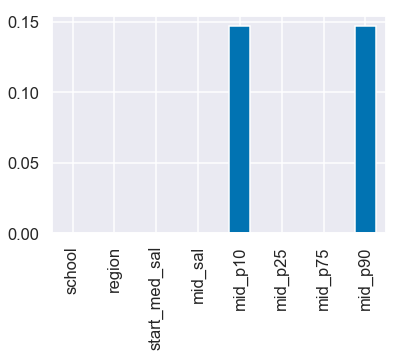

In [11]:
# visualized missing data
(data2.isnull().sum()/len(data2)).plot(kind='bar')

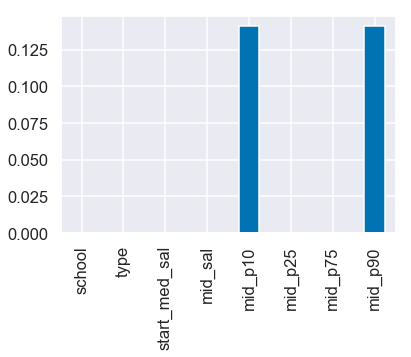

In [12]:
# visualized missing data
(data3.isnull().sum()/len(data3)).plot(kind='bar')

##### It is obvious that the data is missing only for mid-career 10th and 90th percentile, let's see if we can interpolate this data based on the region and nearby university and type later when we merge the datasets 2 and 3 (because they have common variable = school).

In [13]:
#to show that there are no duplicates for majors
data1['major'].value_counts()

Interior Design                         1
Forestry                                1
Art History                             1
Geography                               1
Chemistry                               1
Philosophy                              1
Film                                    1
Aerospace Engineering                   1
Nursing                                 1
Mechanical Engineering                  1
Nutrition                               1
Marketing                               1
Journalism                              1
Information Technology (IT)             1
Accounting                              1
Geology                                 1
Computer Engineering                    1
English                                 1
Architecture                            1
Religion                                1
Music                                   1
Management Information Systems (MIS)    1
Civil Engineering                       1
Chemical Engineering              

## Data analysis

In [14]:
# to see what major has the highest fresh out of college salary
sorted_d1 = data1.sort_values('start_med_sal', ascending=False)
sorted_d1.iloc[:,0:2].head(20)

,major,start_med_sal
43,Physician Assistant,74300.0
8,Chemical Engineering,63200.0
12,Computer Engineering,61400.0
19,Electrical Engineering,60900.0
38,Mechanical Engineering,57900.0
1,Aerospace Engineering,57700.0
30,Industrial Engineering,57700.0
13,Computer Science,55900.0
40,Nursing,54200.0
10,Civil Engineering,53900.0


#### This might suggest that if you choose to be any type of Engineer you end up in the top 10 earners.

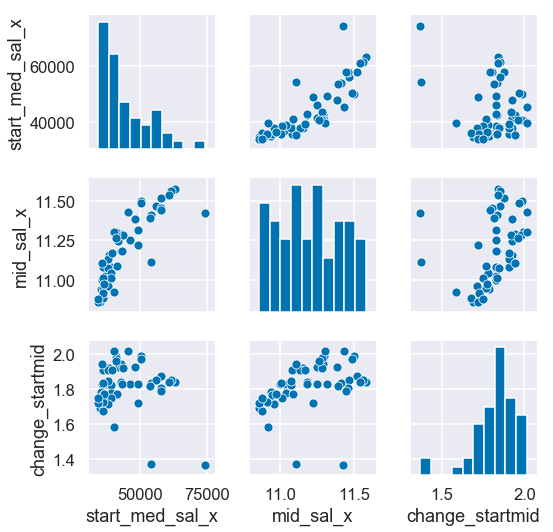

In [15]:
x = data1['major'].dropna()
y = data1['start_med_sal'][data1.start_med_sal!=0].dropna()
z = data1['mid_sal'][data1.mid_sal!=0].dropna()
p = data1['change_startmid'].dropna()

p = sns.pairplot(pd.DataFrame(list(zip(x,y, np.log(z), np.log10(p))), columns=['major', 'start_med_sal_x', 'mid_sal_x', 'change_startmid']), palette="Set2" )

In [16]:
# to see what uni grads have the highest fresh out of college salary
sorted_d2 = data2.sort_values('start_med_sal', ascending=False)
sorted_d2.iloc[:,0:3].head(20)

,school,region,start_med_sal
1,California Institute of Technology (CIT),California,75500.0
222,Massachusetts Institute of Technology (MIT),Northeastern,72200.0
2,Harvey Mudd College,California,71800.0
0,Stanford University,California,70400.0
221,Princeton University,Northeastern,66500.0
141,Rice University,Southern,64000.0
224,Harvard University,Northeastern,63400.0
226,"Polytechnic University of New York, Brooklyn",Northeastern,62400.0
227,Cooper Union,Northeastern,62200.0
229,Carnegie Mellon University (CMU),Northeastern,61800.0


#### This might suggest that if you better go to the Northeastern region.

#### Now let's look at the salary depending on the type of school.

In [42]:
#to define the starting median salary for different type of schools
engSalaries = data3["start_med_sal"][data3["type"] == "Engineering"]
libSalaries = data3["start_med_sal"][data3["type"] == "Liberal Arts"]
partySalaries = data3["start_med_sal"][data3["type"] == "Party"]
ivySalaries = data3["start_med_sal"][data3["type"] == "Ivy League"]
stateSalaries = data3["start_med_sal"][data3["type"] == "State"]

print("Mean (starting) salary for Ivy League Schools:")
print(ivySalaries.mean())


print("Mean (starting) salary for Engineering Schools:")
print(engSalaries.mean())

print("Mean (starting) salary for State Schools:")
print(stateSalaries.mean())

print("Mean (starting) salary for Liberal Arts Schools")
print(libSalaries.mean())

print("Mean (starting) salary for Party Schools")
print(partySalaries.mean())


Mean (starting) salary for Ivy League Schools:
60475.0
Mean (starting) salary for Engineering Schools:
59057.89473684211
Mean (starting) salary for State Schools:
44126.28571428572
Mean (starting) salary for Liberal Arts Schools
45746.8085106383
Mean (starting) salary for Party Schools
45715.0


#### Let's analyze the starting median salary range for Engineering and Ivy League School.

Text(0.5, 0, 'Starting Median Salary')

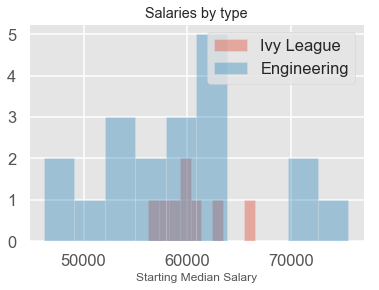

In [43]:
plt.style.use('ggplot')

plt.hist(ivySalaries, alpha=0.4, label='Ivy League')
plt.hist(engSalaries, alpha=0.4,  label='Engineering')

plt.legend(loc='upper right')

plt.title("Salaries by type")
plt.xlabel('Starting Median Salary')

#### need to analyze this relationship more

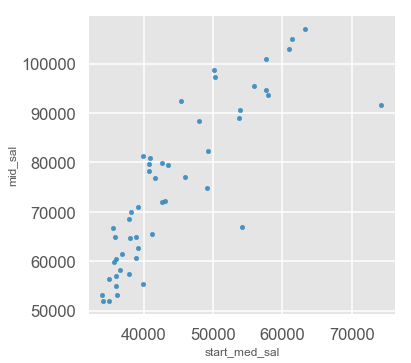

In [19]:
#analyze the relationship b/n starting median salary and mid-salary for dataset 1
f, ax = plt.subplots(figsize=(5.5, 5.5))
data1.plot.scatter('start_med_sal','mid_sal',alpha=0.90,ax=ax)

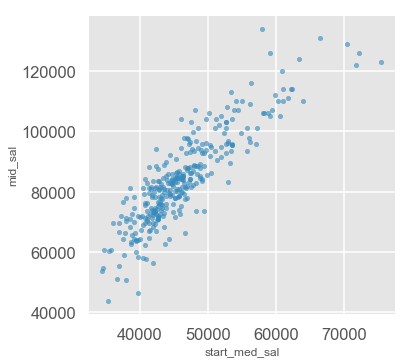

In [20]:
#analyze the relationship b/n starting median salary and mid-salary for dataset 2
f, ax = plt.subplots(figsize=(5.5, 5.5))
data2.plot.scatter('start_med_sal','mid_sal',alpha=0.60,ax=ax)

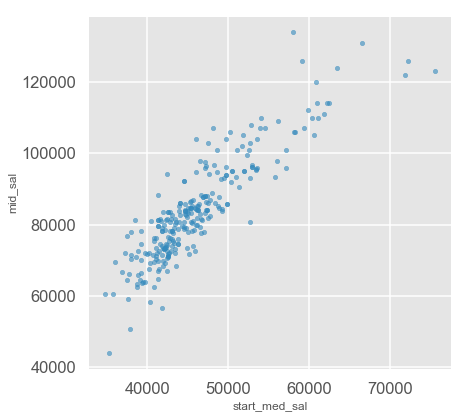

In [21]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
data3.plot.scatter('start_med_sal','mid_sal',alpha=0.60,ax=ax)

### Merging two datasets

In [22]:
# because data2 and data3 have a common column school i am able to merge these datasets
new_dataset=data2.merge(data3, left_on='school' , right_on='school')

In [23]:
new_dataset.head()

,school,region,start_med_sal_x,mid_sal_x,mid_p10_x,mid_p25_x,mid_p75_x,mid_p90_x,type,start_med_sal_y,mid_sal_y,mid_p10_y,mid_p25_y,mid_p75_y,mid_p90_y
0,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN,Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
1,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
2,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0,State,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
3,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN,Liberal Arts,51900.0,105000.0,NaN,54800.0,157000.0,NaN
4,Cal Poly San Luis Obispo,California,57200.0,101000.0,55000.0,74700.0,133000.0,178000.0,State,57200.0,101000.0,55000.0,74700.0,133000.0,178000.0


## Further EDA

In [24]:
CAsal = new_dataset["start_med_sal_x"][new_dataset["region"] == "California"]
NEsal = new_dataset["start_med_sal_x"][new_dataset["region"] == "Northeastern"]
Wsal = new_dataset["start_med_sal_x"][new_dataset["region"] == "Western"]
MWsal = new_dataset["start_med_sal_x"][new_dataset["region"] == "Midwestern"]
Ssal = new_dataset["start_med_sal_x"][new_dataset["region"] == "Southern"]

Text(0.5, 0, 'Starting Median Salary')

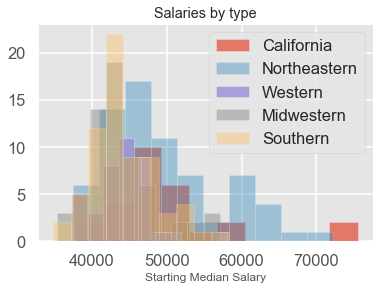

In [25]:
plt.style.use('ggplot')
plt.axes.titlesize : 24
plt.axes.labelsize : 20


plt.hist(CAsal, alpha=0.7, label='California')
plt.hist(NEsal, alpha=0.4,  label='Northeastern')
plt.hist(Wsal, alpha=0.8,  label='Western')
plt.hist(MWsal, alpha=0.4,  label='Midwestern')
plt.hist(Ssal, alpha=0.4,  label='Southern')


plt.legend(loc='upper right')

plt.title("Salaries by type")
plt.xlabel('Starting Median Salary')

In [26]:
mid_p10_test = new_dataset["mid_p10_x"][new_dataset["region"] == "California"]
print("Mean mid-career 10 percentile for California Schools:")
print(mid_p10_test.mean())

Mean mid-career 10 percentile for California Schools:
46871.42857142857


In [27]:
mid_p10_test2 = new_dataset["mid_p10_y"][new_dataset["region"] == "California"]
print("Mean mid-career 10 percentile for California Schools:")
print(mid_p10_test2.median())

Mean mid-career 10 percentile for California Schools:
46450.0


In [28]:
#lets look at correlation
corr = new_dataset.corr()
corr.style.background_gradient(cmap='RdBu_r', axis=None) # 'coolwarm', RdBu_r', & 'BrBG' good color maps

,start_med_sal_x,mid_sal_x,mid_p10_x,mid_p25_x,mid_p75_x,mid_p90_x,start_med_sal_y,mid_sal_y,mid_p10_y,mid_p25_y,mid_p75_y,mid_p90_y
start_med_sal_x,1,0.89244,0.885654,0.906168,0.765723,0.701486,1,0.892445,0.882705,0.906168,0.765723,0.708638
mid_sal_x,0.89244,1,0.872124,0.919653,0.917956,0.859479,0.89244,1,0.878179,0.919653,0.917956,0.864416
mid_p10_x,0.885654,0.872124,1,0.939604,0.754811,0.636794,0.885654,0.872132,1,0.939604,0.754811,0.636794
mid_p25_x,0.906168,0.919653,0.939604,1,0.770937,0.733215,0.906168,0.919663,0.943244,1,0.770937,0.744817
mid_p75_x,0.765723,0.917956,0.754811,0.770937,1,0.938697,0.765723,0.917968,0.766674,0.770937,1,0.941121
mid_p90_x,0.701486,0.859479,0.636794,0.733215,0.938697,1,0.701486,0.859494,0.636794,0.733215,0.938697,1
start_med_sal_y,1,0.89244,0.885654,0.906168,0.765723,0.701486,1,0.892445,0.882705,0.906168,0.765723,0.708638
mid_sal_y,0.892445,1,0.872132,0.919663,0.917968,0.859494,0.892445,1,0.878187,0.919663,0.917968,0.86443
mid_p10_y,0.882705,0.878179,1,0.943244,0.766674,0.636794,0.882705,0.878187,1,0.943244,0.766674,0.654818
mid_p25_y,0.906168,0.919653,0.939604,1,0.770937,0.733215,0.906168,0.919663,0.943244,1,0.770937,0.744817


#### Let's look at relationships in the new merged dataset

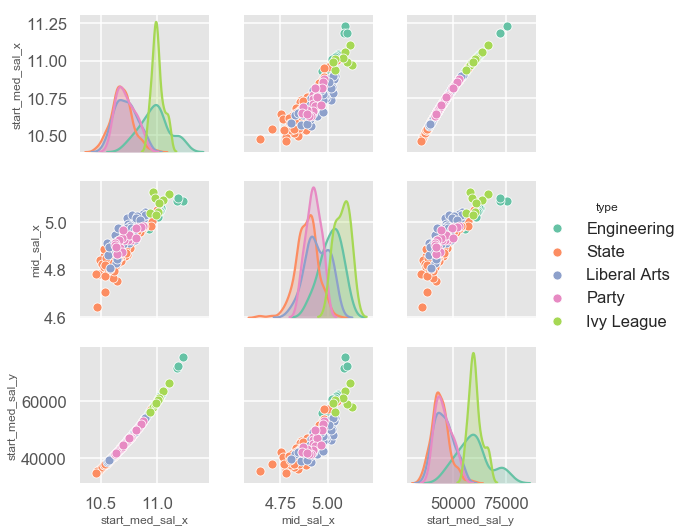

In [29]:
x = new_dataset['school'].dropna()
y = new_dataset['region'].dropna()
z = new_dataset['start_med_sal_x'][new_dataset.start_med_sal_x!=0].dropna()
p = new_dataset['mid_sal_x'][new_dataset.mid_sal_x!=0].dropna()
t = new_dataset['type'].dropna()
start_salary = new_dataset['start_med_sal_y']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, start_salary)), columns=['school','region', 'start_med_sal_x', 'mid_sal_x', 'type', 'start_med_sal_y']),hue="type", palette="Set2" )

#### The results of pairwise correlation suggest which of the correlation of starting median salary and mid-career salary from two datasets is better depending on the type. It still suggest the prevalance of the Engineering and Ivy League schools.

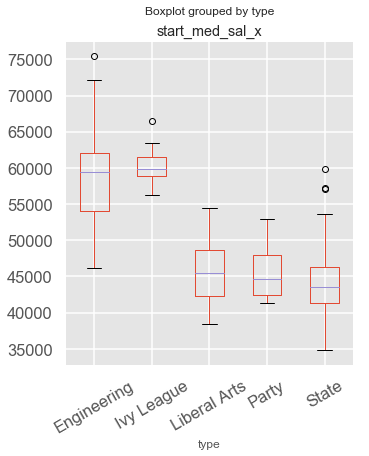

In [30]:
new_dataset.boxplot('start_med_sal_x','type',rot = 30,figsize=(5,6))

#### Even though the range for the Eng school is wider, because the Ivy League's median higher, as well as the range is smaller, it suggests that IL might lead you to the best starting salary fresh out of college.

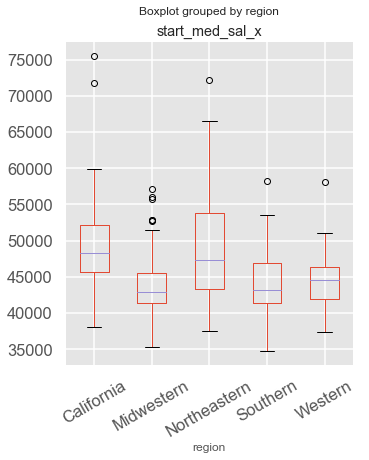

In [31]:
new_dataset.boxplot('start_med_sal_x','region',rot = 30,figsize=(5,6))

#### The top two regions to be are CA and NE.

In [32]:
# to see what uni grads have the highest fresh out of college salary
sorted_final = new_dataset.sort_values('start_med_sal_x', ascending=False)
sorted_final.iloc[:,0:3].head(20)

,school,region,start_med_sal_x
0,California Institute of Technology (CIT),California,75500.0
200,Massachusetts Institute of Technology (MIT),Northeastern,72200.0
1,Harvey Mudd College,California,71800.0
199,Princeton University,Northeastern,66500.0
202,Harvard University,Northeastern,63400.0
204,"Polytechnic University of New York, Brooklyn",Northeastern,62400.0
205,Cooper Union,Northeastern,62200.0
207,Carnegie Mellon University (CMU),Northeastern,61800.0
208,Rensselaer Polytechnic Institute (RPI),Northeastern,61100.0
206,Worcester Polytechnic Institute (WPI),Northeastern,61000.0


In [33]:
# to see what uni grads have the highest fresh out of college salary
sorted_d3 = data1.sort_values('change_startmid', ascending=False)
sorted_d3.iloc[:,0:4].head(20)

,major,start_med_sal,mid_sal,change_startmid
37,Math,45400.0,92400.0,103.5
42,Philosophy,39900.0,81200.0,103.5
33,International Relations,40900.0,80900.0,97.8
17,Economics,50100.0,98600.0,96.8
36,Marketing,40800.0,79600.0,95.1
44,Physics,50300.0,97300.0,93.4
45,Political Science,40800.0,78200.0,91.7
9,Chemistry,42600.0,79900.0,87.6
34,Journalism,35600.0,66700.0,87.4
4,Architecture,41600.0,76800.0,84.6


#### The fastest growing salaries are for Math, Philosophy, IR, Econ and Marketing majors; however, it is not clear why.

In [44]:
### to be able to do some ML

new_dataset['school']=new_dataset['school'].astype('category').cat.codes
new_dataset['region']=new_dataset['school'].astype('category').cat.codes
new_dataset['type']=new_dataset['school'].astype('category').cat.codes


In [35]:
new_dataset.dtypes

school               int16
region               int16
start_med_sal_x    float64
mid_sal_x          float64
mid_p10_x          float64
mid_p25_x          float64
mid_p75_x          float64
mid_p90_x          float64
type                 int16
start_med_sal_y    float64
mid_sal_y          float64
mid_p10_y          float64
mid_p25_y          float64
mid_p75_y          float64
mid_p90_y          float64
dtype: object

In [45]:
# to make the final merged dataset smaller

selection=['school','region','start_med_sal_x','mid_sal_x','type','mid_p25_x','mid_p75_x']
fin_datamerged=pd.DataFrame(new_dataset,columns=selection)
fin_datamerged.head()

,school,region,start_med_sal_x,mid_sal_x,type,mid_p25_x,mid_p75_x
0,16,16,75500.0,123000.0,16,104000.0,161000.0
1,60,60,71800.0,122000.0,60,96000.0,180000.0
2,148,148,59900.0,112000.0,148,81000.0,149000.0
3,91,91,51900.0,105000.0,91,54800.0,157000.0
4,15,15,57200.0,101000.0,15,74700.0,133000.0


### Training Variables

In [37]:
training_variables = ['school','region','mid_sal_x','type','mid_p25_x','mid_p75_x']

X_train, X_test, y_train, y_test = train_test_split(fin_datamerged[training_variables],
                 fin_datamerged['start_med_sal_x'], test_size=0.2)

In [38]:
rf = RandomForestClassifier()
param_dist = {"n_estimators": stats.randint(2, 300),
              "max_features": ['sqrt',  'log2'],
              "min_samples_split": stats.randint(5, 50),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
random_rf = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=20, cv=5, verbose=1, n_jobs=-1)
random_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/botasakhi/miniconda3/envs/em212_myjob/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.1s finished
/Users/botasakhi/miniconda3/envs/em212_myjob/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x113257668>, 'max_features': ['sqrt', 'log2'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1132c1710>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

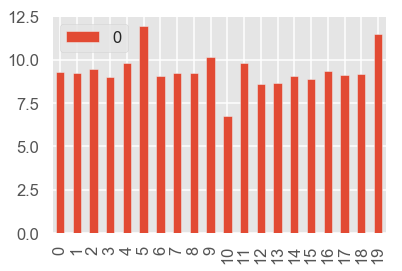

In [39]:
pd.DataFrame(random_rf.cv_results_['std_test_score'] * 100).plot(kind='bar') 

/Users/botasakhi/miniconda3/envs/em212_myjob/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Text(0.5, 1.0, 'Average Accuracy for Train and Test Data')

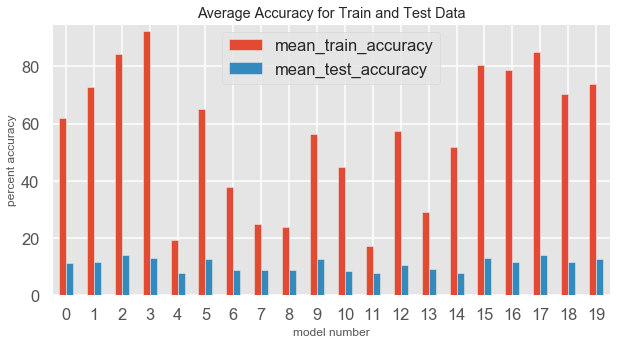

In [40]:
train_test_results = pd.DataFrame([random_rf.cv_results_['mean_train_score'],
                                   random_rf.cv_results_['mean_test_score']]).T * 100
train_test_results.columns = ['mean_train_accuracy', 'mean_test_accuracy']
f, ax = plt.subplots(figsize=(10,5))
train_test_results.plot(kind='bar', ax=ax)
plt.xticks(rotation=0, horizontalalignment='center')
plt.legend(loc=0)
plt.ylim(0, 95)
plt.xlabel('model number')
plt.ylabel('percent accuracy')
plt.title('Average Accuracy for Train and Test Data')

## Conclusion

#### Firstly, my analysis confirmed my assumption that you don't need to be an Ivy graduate to do well after school; however, it sure lets you to position yourself at the higher salary point while still keeping the small range. In addition, my analysis **confirmed** that it is better to be STEM major as well as it is better to stay in the NE or CA region.

#### Secondly, the analysis showed some interesting data suggesting that majors that are not usually considered top still let you have a great salary 5-10 years after graduation, which might suggest that the major **does not matter** all that much.

#### Thirdly, even though I could not find an appropriate outside dataset that has all the necessary columns for me to look at, my research helped me discover more reports on the same subject (for ex, an extensive report from the Georgetown University found here: https://cew.georgetown.edu/cew-reports/valueofcollegemajors/#explore-data), which will be helpful for my purpose. Even though I don't see the actual dataset, it is good to gain some outside perspective.

#### Finally, unfortunatelly i was unable to fully do the machine learning analysis, but i plan to continue this after i gain a deeper understanding of ML.